# Credit Card Fraud Detection 

## What is Credit Card Fraud?

Credit card fraud is a common term that is widely used for various modes of theft and fraud carried out using or involving payment cards, such as credit or debit cards, in transactions. Credit card fraud occurs online or offline. As a business owner, credit card fraud can be avoided by recognizing the possibility of fraudulent use of credit cards in the payment environment.

## Problem Statement

The Credit Card Fraud Detection Problem includes modeling past credit card transactions with the knowledge that turns out to be a fraud. This model is then used to identify whether new transactions will be fraudulent or not. The goal here is to detect 100% of fraudulent transactions while minimizing the incorrect fraud classifications.

## Dataset Information

1. Dataset contains transactions made with credit cards in September 2013 in Europe. Based on the existing dataset, very few transactions are fraudulent (less than 1%). The data set has highly skewed, consisting of 492 frauds with a total of 284,807 observations. This resulted in only 0.172% of fraud cases. This skewed set is justified by the low number of fraudulent transactions.
2. The dataset consists of numerical values from 28 features modified by 'Principal Component Analysis (PCA)', i.e. V1 to V28. Additionally, no metadata about the original features are provided, so pre-analysis or feature studies cannot be performed.
3. The 'Time' and 'Amount' features are the only features that are not changed. The Time feature contains the seconds that have passed between each transaction and the first transaction in the data set. The Amount feature is The number of transactions, this feature can be used as cost-dependent learning.
4. The class feature is a response variable that takes a value of 1 in case of fraud and a value of 0 otherwise. 
5. No missing value is lost in the data set.

# Data Exploration

## Load Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats
from scipy.stats import norm, skew #for some statistics

%matplotlib inline
sns.set_style("whitegrid")

## Read the data

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

## Description

In [3]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.473120e-16  8.042109e-16  5.282512e-16  4.456271e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.426896e-15  1.701640e-15 -3.662252e-16 -1.217809e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

## Data type identification

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# Exploratory Data Analysis

## Numerical Approach

### Statistical Summary

In [6]:
describeNum = df.describe(include =['float64', 'int64', 'float', 'int'])
describeNum.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

## Missing Values 

In [7]:
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1) 

## The only non-transformed variables are:
- Time
- Amount
- Class (1: fraud, 0: not_fraud)

## Graphic Approach

### Correlation heatmap

In [8]:
df.corr()

Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2     -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3     -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4     -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
V5      0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
V6     -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
V7      0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
V8     -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
V9     -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10     0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
V11    -0.247689  2.125498e-16  1.975426e-16  1.576830e-15  3.459380e-16   
V12     0.124348  2.053457e-16 -9.568710e-17  6.310231e-16 -5.625518e-16   
V13    -0.065902 -2.425603e-17  6.295388e-16  2.807652e-16  1.303306e-16   
V14    -0.098757 -5.020280e-16 -1.730566e-16  4.739859e-16  2.282280e-16   
V15    -0.183453  3.547782e-16 -4.995814e-17  9.068793e-16  1.377649e-16   
V16     0.011903  7.212815e-17  1.177316e-17  8.299445e-16 -9.614528e-16   
V17    -0.073297 -3.879840e-16 -2.685296e-16  7.614712e-16 -2.699612e-16   
V18     0.090438  3.230206e-17  3.284605e-16  1.509897e-16 -5.103644e-16   
V19     0.028975  1.502024e-16 -7.118719e-18  3.463522e-16 -3.980557e-16   
V20    -0.050866  4.654551e-16  2.506675e-16 -9.316409e-16 -1.857247e-16   
V21     0.044736 -2.457409e-16 -8.480447e-17  5.706192e-17 -1.949553e-16   
V22     0.144059 -4.290944e-16  1.526333e-16 -1.133902e-15 -6.276051e-17   
V23     0.051142  6.168652e-16  1.634231e-16 -4.983035e-16  9.164206e-17   
V24    -0.016182 -4.425156e-17  1.247925e-17  2.686834e-19  1.584638e-16   
V25    -0.233083 -9.605737e-16 -4.478846e-16 -1.104734e-15  6.070716e-16   
V26    -0.041407 -1.581290e-17  2.057310e-16 -1.238062e-16 -4.247268e-16   
V27    -0.005135  1.198124e-16 -4.966953e-16  1.045747e-15  3.977061e-17   
V28    -0.009413  2.083082e-15 -5.093836e-16  9.775546e-16 -2.761403e-18   
Amount -0.010596 -2.277087e-01 -5.314089e-01 -2.108805e-01  9.873167e-02   
Class  -0.012323 -1.013473e-01  9.128865e-02 -1.929608e-01  1.334475e-01   

                  V5            V6            V7            V8            V9  \
Time    1.730721e-01 -6.301647e-02  8.471437e-02 -3.694943e-02 -8.660434e-03   
V1      1.812612e-17 -6.506567e-16 -1.005191e-15 -2.433822e-16 -1.513678e-16   
V2      5.157519e-16  2.787346e-16  2.055934e-16 -5.377041e-17  1.978488e-17   
V3     -6.539009e-17  1.627627e-15  4.895305e-16 -1.268779e-15  5.568367e-16   
V4     -1.719944e-15 -7.491959e-16 -4.104503e-16  5.697192e-16  6.923247e-16   
V5      1.000000e+00  2.408382e-16  2.715541e-16  7.437229e-16  7.391702e-16   
V6      2.408382e-16  1.000000e+00  1.191668e-16 -1.104219e-16  4.131207e-16   
V7      2.715541e-16  1.191668e-16  1.000000e+00  3.344412e-16  1.122501e-15   
V8      7.437229e-16 -1.104219e-16  3.344412e-16  1.000000e+00  4.356078e-16   
V9      7.391702e-16  4.131207e-16  1.122501e-15  4.356078e-16  1.000000e+00   
V10    -5.202306e-16  5.932243e-17 -7.492834e-17 -2.801370e-16 -4.642274e-16   
V11     7.203963e-16  1.980503e-15  1.425248e-16  2.487043e-16  1.354680e-16   
V12     7.412552e-16  2.375468e-16 -3.536655e-18  1.839891e-16 -1.079314e-15   
V13     5.886991e-16 -1.211182e-16  1.266462e-17 -2.921856e-16  2.251072e-15   
V14     6.565143e-16  2.621312e-16  2.607772e-16 -8.599156e-16  3.784757e-15   
V15    -8.720275e-16 -1.531188e-15 -1.690540e-16  4.127777e-16 -1.051167e-15   
V16     2.246261e-15  2.623672e-18  5.869302e-17 -5.254741e-16 -1.214086e-15   
V17     1.281914e-16  2.015618e-16  2.177192e-16 -2.269549e-16  1.113695e-15   
V18     5.308590e-16  1.223814e-16  7.604126e-17 -3.667974e

(31.5, -0.5)

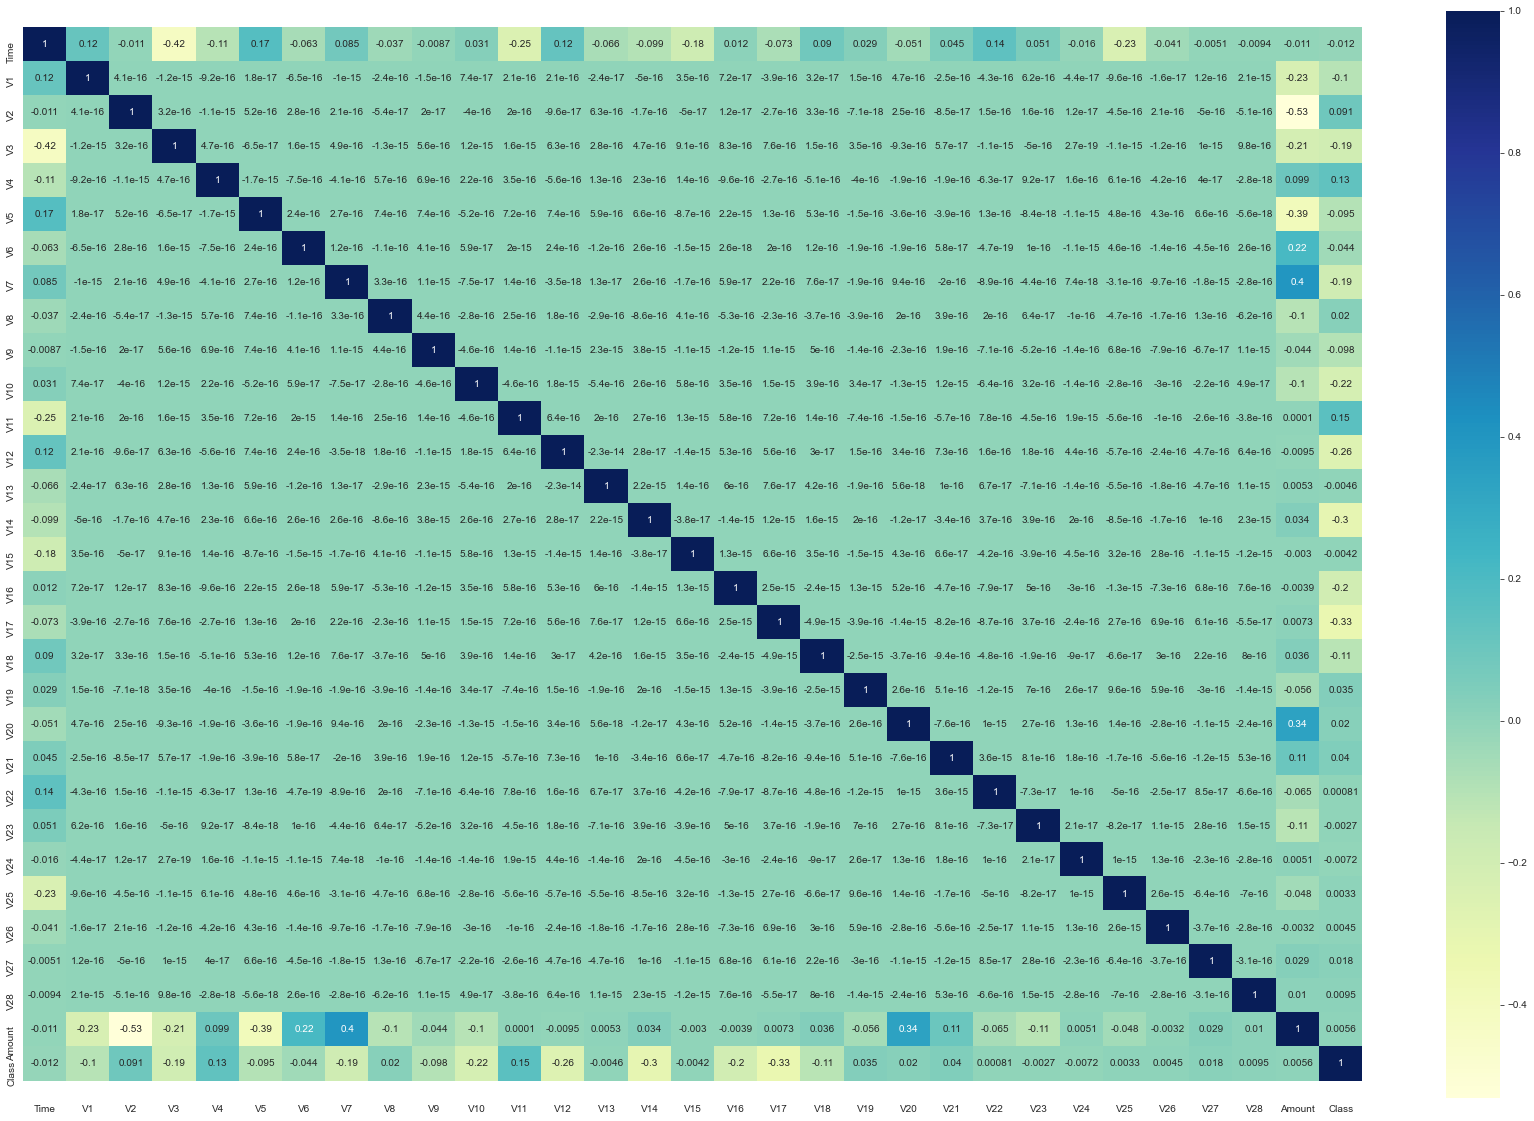

In [9]:
plt.figure(figsize=(30,20))
ax = sns.heatmap(data = df.corr(),cmap='YlGnBu',annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)

Highest correlations come from:
- Time & V3 (-0.42)
- Amount & V2 (-0.53)
- Amount & V4 (0.4)

Although this correlation is high, it is not expected that this is risky of multicollinearity. The correlation matrix also indicates that no PCA V1 to V28 components have correlations with each other, but if observed the existing class has some form of positive and negative correlation with the V component but has no correlation with Time and Amount.

### Boxplot

In [10]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

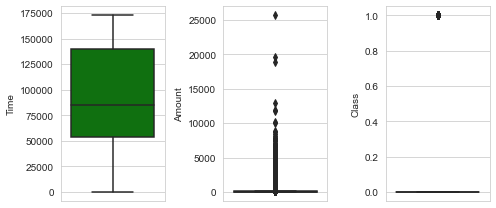

In [11]:
features1 = ['Time','Amount','Class']

plt.figure(figsize=(7, 3))
for i in range(0, len(features1)):
    plt.subplot(1, len(features1), i+1)
    sns.boxplot(y=df[features1[i]], color='green', orient='v')
    plt.tight_layout()

In [12]:
tmp = df[['Amount','Class']].copy()
normal = tmp.loc[tmp['Class'] == 0]['Amount']
fraud = tmp.loc[tmp['Class'] == 1]['Amount']
normal.describe(), fraud.describe()

(count    284315.000000
 mean         88.291022
 std         250.105092
 min           0.000000
 25%           5.650000
 50%          22.000000
 75%          77.050000
 max       25691.160000
 Name: Amount, dtype: float64,
 count     492.000000
 mean      122.211321
 std       256.683288
 min         0.000000
 25%         1.000000
 50%         9.250000
 75%       105.890000
 max      2125.870000
 Name: Amount, dtype: float64)

The real transaction have a larger mean value, smaller Q1, Q3 ,and Q4 and larger outliers;

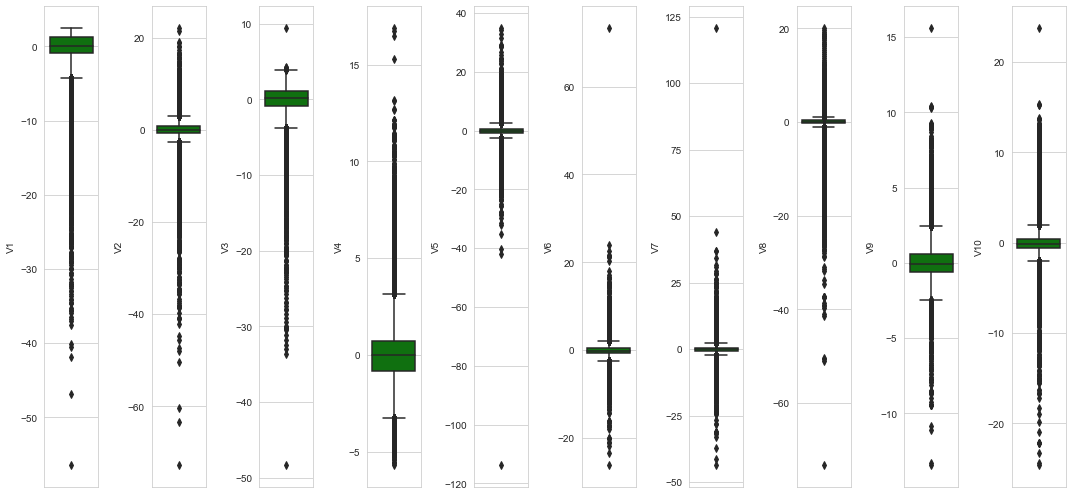

In [13]:
features2 = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10']

plt.figure(figsize=(15, 7))
for i in range(0, len(features2)):
    plt.subplot(1, len(features2), i+1)
    sns.boxplot(y=df[features2[i]], color='green', orient='v')
    plt.tight_layout()

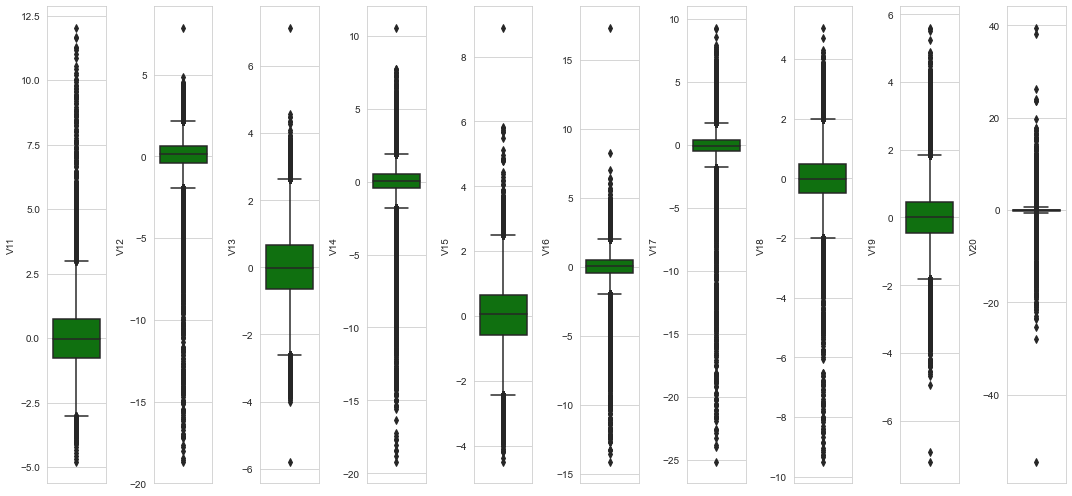

In [14]:
features3 = ['V11','V12','V13','V14','V15','V16','V17','V18','V19','V20']

plt.figure(figsize=(15, 7))
for i in range(0, len(features3)):
    plt.subplot(1, len(features3), i+1)
    sns.boxplot(y=df[features3[i]], color='green', orient='v')
    plt.tight_layout()

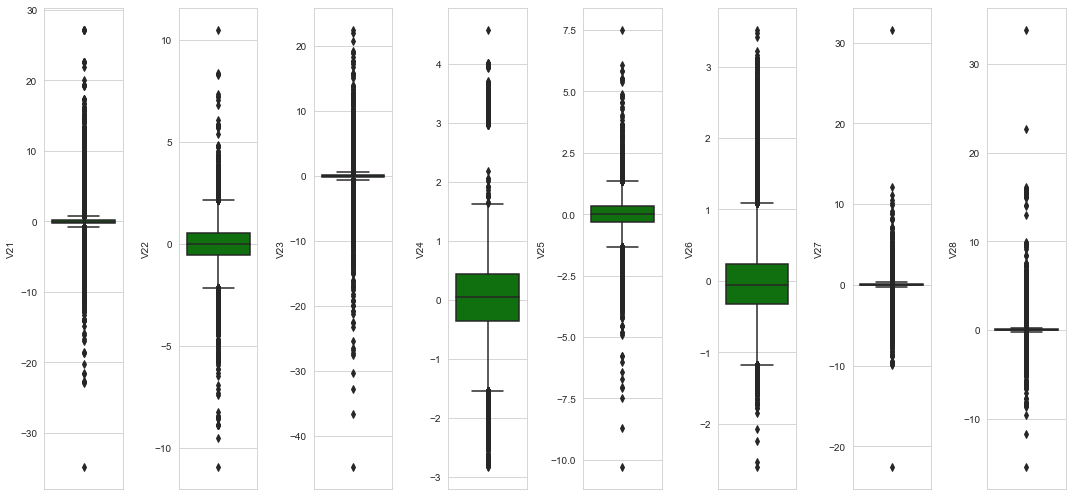

In [15]:
features4 = ['V21','V22','V23','V24','V25','V26','V27','V28']

plt.figure(figsize=(15, 7))
for i in range(0, len(features4)):
    plt.subplot(1, len(features4), i+1)
    sns.boxplot(y=df[features4[i]], color='green', orient='v')
    plt.tight_layout()

### Histogram

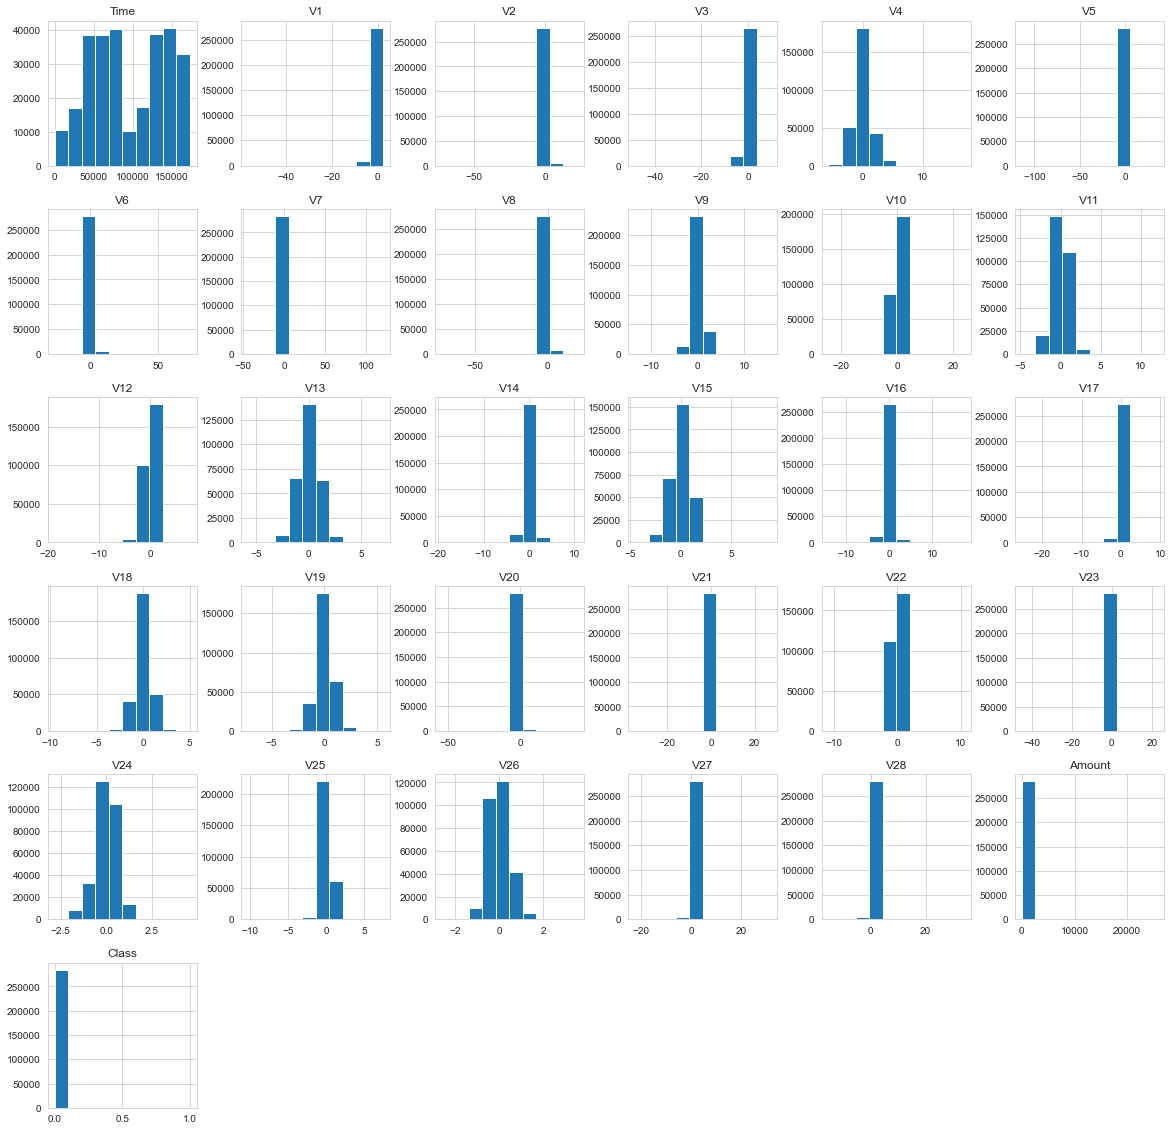

In [16]:
df.hist(figsize=(20, 20));

### Credit Card Transactions Time Density Plot

In [17]:
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]
#plt.figure(figsize = (14,4))
#plt.title('Credit Card Transactions Time Density Plot')
#sns.set_color_codes("pastel")
#sns.distplot(class_0,kde=True,bins=480)
#sns.distplot(class_1,kde=True,bins=480)
#plt.show()
hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

Fraudulent transactions have a distribution more even than legitimate transactions.

### How many customer are normal and fraud have?

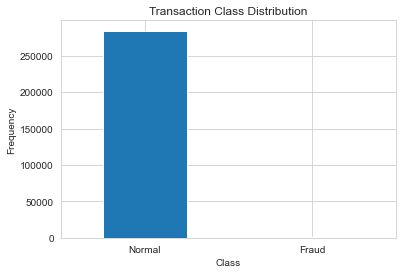

In [18]:
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(df['Class'])
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [19]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Look at the unbalanced existing datasets! Most transactions are non-fraudulent. If using this dataset framework as a basis for modeling and prediction analysis will probably get a lot of errors and the existing algorithms may not be suitable because it will "assume" that most transactions are not fraudulent. But in this case do not want the model made just assume only, what is desirable is that the model can detect patterns that give signs of fraud. 

### Determine the number of fraud and valid transactions in the entire dataset.

In [20]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

In [21]:
print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

Shape of Fraudulant transactions: (492, 31)
Shape of Non-Fraudulant transactions: (284315, 31)


### How different are the amount of money used in different transaction classes?

In [22]:
pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)

Amount         Amount
count   492.000000  284315.000000
mean    122.211321      88.291022
std     256.683288     250.105092
min       0.000000       0.000000
25%       1.000000       5.650000
50%       9.250000      22.000000
75%     105.890000      77.050000
max    2125.870000   25691.160000

### Do fraudulent transactions occur more often during certain time frame ?

In [23]:
pd.concat([fraud.Time.describe(), normal.Time.describe()], axis=1)

Time           Time
count     492.000000  284315.000000
mean    80746.806911   94838.202258
std     47835.365138   47484.015786
min       406.000000       0.000000
25%     41241.500000   54230.000000
50%     75568.500000   84711.000000
75%    128483.000000  139333.000000
max    170348.000000  172792.000000

### Amount & Time Distributions Features

C:\Users\mfmoh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\mfmoh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



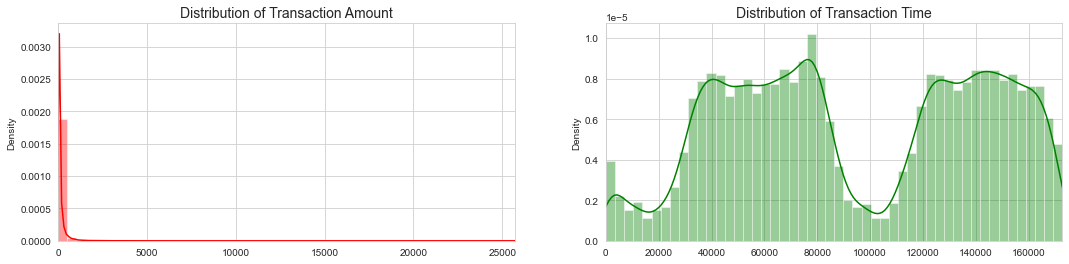

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='red')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='green')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

C:\Users\mfmoh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\mfmoh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



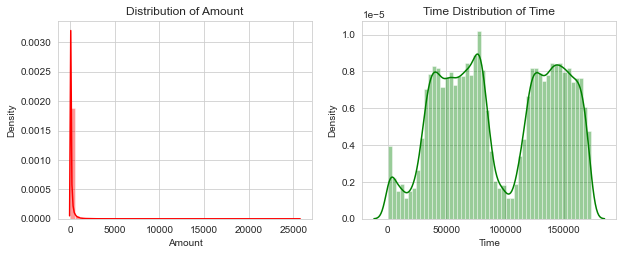

In [25]:
plt.figure(figsize=(10,8))

#plot the amount feature
plt.subplot(2, 2, 1)
plt.title('Distribution of Amount')
sns.distplot(df['Amount'],color='red');

# plot the time feature
plt.subplot(2, 2, 2)
plt.title('Time Distribution of Time')
sns.distplot(df['Time'], color='green');

#### Time on class 1 and 0

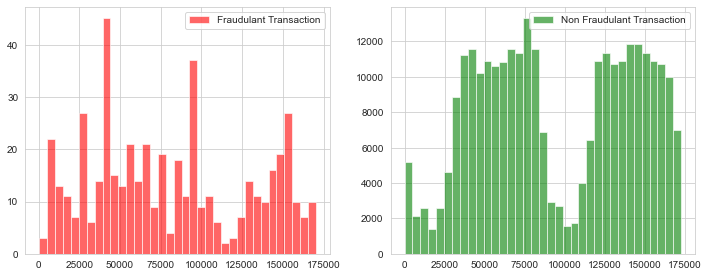

In [26]:
# df[df.Class == 0].Time.hist(bins=35, color='green', alpha=0.6)
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
df[df.Class == 1].Time.hist(bins=35, color='red', alpha=0.6, label="Fraudulant Transaction")
plt.legend()

plt.subplot(2, 2, 2)
df[df.Class == 0].Time.hist(bins=35, color='green', alpha=0.6, label="Non Fraudulant Transaction")
plt.legend()

#### Amount on class 1 and 0

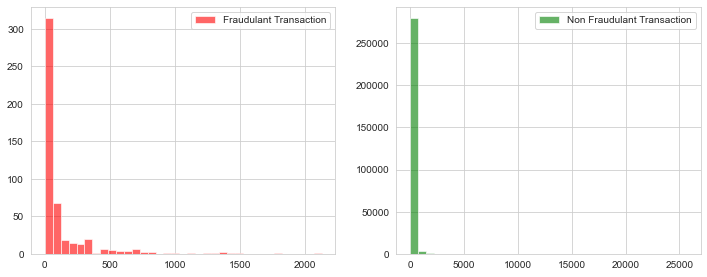

In [27]:
# df[df.Class == 0].Time.hist(bins=35, color='green', alpha=0.6)
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
df[df.Class == 1].Amount.hist(bins=35, color='red', alpha=0.6, label="Fraudulant Transaction")
plt.legend()

plt.subplot(2, 2, 2)
df[df.Class == 0].Amount.hist(bins=35, color='green', alpha=0.6, label="Non Fraudulant Transaction")
plt.legend()

By looking at its distribution, it can be known how skewed these features are, it can also see a further distribution of other features. Looks like the timing of the transaction doesn't matter here as observed above. Now it's time to take sample datasets for modeling and prediction results.

# Data Pre-processing

## Anomaly Detection:

## Duplicate Values

In [28]:
duplicate = df[df.duplicated()] 
  
print("Duplicate Rows :")

Duplicate Rows :


## Outliers

In [30]:
# def drop_outliers(df, field_name):
#     iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
#     df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
#     df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)

In [31]:
# drop_outliers(df, 'Amount')
# drop_outliers(df, 'Time')
# drop_outliers(df, 'V1')
# drop_outliers(df, 'V2')
# drop_outliers(df, 'V3')
# drop_outliers(df, 'V4')
# drop_outliers(df, 'V5')
# drop_outliers(df, 'V6')
# drop_outliers(df, 'V7')
# drop_outliers(df, 'V8')
# drop_outliers(df, 'V9')
# drop_outliers(df, 'V10')
# drop_outliers(df, 'V11')
# drop_outliers(df, 'V12')
# drop_outliers(df, 'V13')
# drop_outliers(df, 'V14')
# drop_outliers(df, 'V15')
# drop_outliers(df, 'V16')
# drop_outliers(df, 'V17')
# drop_outliers(df, 'V18')
# drop_outliers(df, 'V19')
# drop_outliers(df, 'V20')
# drop_outliers(df, 'V21')
# drop_outliers(df, 'V22')
# drop_outliers(df, 'V23')
# drop_outliers(df, 'V24')
# drop_outliers(df, 'V25')
# drop_outliers(df, 'V26')
# drop_outliers(df, 'V27')
# drop_outliers(df, 'V28')

## Negative value

In [33]:
features = ['Time','Amount']

for a in range(len(features)):
    print("Is there any negative value in '{}' column  : {} ".format(features[a],(df[features[a]]<0).any()))

Is there any negative value in 'Time' column  : False 
Is there any negative value in 'Amount' column  : False 


## Log-transformation Amount variable

In [34]:
# print(f"Skewness Co-efficient: {round(df.Amount.skew(), 3)}")
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

# ## Histogram 
# sns.distplot(df['Amount'] , fit=stats.norm, ax=ax1)
# ax1.set_title('Histogram')

# ## Probability / QQPLOT
# stats.probplot(df['Amount'], plot=ax2)

# plt.show()

In [35]:
# df["Amount"] = np.log1p(df["Amount"])

# ##### GET SKEWNESS #####
# print(f"Skewness Co-efficient: {round(df.Amount.skew(), 3)}")

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

# ##### HISTOGRAM #####
# from scipy import stats
# sns.distplot(df['Amount'] , fit=stats.norm, ax=ax1)
# ax1.set_title('Histogram')

# ##### PROBABILITY / QQ PLOT #####
# stats.probplot(df['Amount'], plot=ax2)

# plt.show()

## Class imbalance

### SMOTE Technique (Over-Sampling):

SMOTE stands for Synthetic Minority Over-sampling Technique. Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems".


<img src= https://raw.githubusercontent.com/rikunert/SMOTE_visualisation/master/SMOTE_R_visualisation_3.png>

Understanding SMOTE:

- Solving the Class Imbalance: SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.
- Location of the synthetic points: SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.
- Final Effect: More information is retained since we didn't have to delete any rows unlike in random undersampling.
- Accuracy || Time Tradeoff: Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.

##### Cross Validation Overfitting Mistake: 

##### Overfitting during Cross Validation:

In our undersample analysis I want to show you a common mistake I made that I want to share with all of you. It is simple, if you want to undersample or oversample your data you should not do it before cross validating. Why because you will be directly influencing the validation set before implementing cross-validation causing a "data leakage" problem. 
<b> In the following section you will see amazing precision and recall scores but in reality our data is overfitting!</b>

##### The Wrong Way:

<img src= https://www.marcoaltini.com/uploads/1/3/2/3/13234002/2639934.jpg?401>

As mentioned previously, if we get the minority class ("Fraud) in our case, and create the synthetic points before cross validating we have a certain influence on the "validation set" of the cross validation process. Remember how cross validation works, let's assume we are splitting the data into 5 batches, 4/5 of the dataset will be the training set while 1/5 will be the validation set. The test set should not be touched! For that reason, we have to do the creation of synthetic datapoints "during" cross-validation and not before, just like below:

##### The Right Way:

<img src= https://www.marcoaltini.com/uploads/1/3/2/3/13234002/9101820.jpg?372>

As you see above, SMOTE occurs "during" cross validation and not "prior" to the cross validation process. Synthetic data are created only for the training set without affecting the validation set.

##### References

1. https://www.marcoaltini.com/blog/dealing-with-imbalanced-data-undersampling-oversampling-and-proper-cross-validation
2. https://rikunert.com/SMOTE_explained
3. https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

In [36]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


Number transactions X_train dataset:  (199364, 30)
Number transactions y_train dataset:  (199364,)
Number transactions X_test dataset:  (85443, 30)
Number transactions y_test dataset:  (85443,)


In [37]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [38]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 356
Before OverSampling, counts of label '0': 199008 

After OverSampling, the shape of train_X: (398016, 30)
After OverSampling, the shape of train_y: (398016,) 

After OverSampling, counts of label '1': 199008
After OverSampling, counts of label '0': 199008


# Modelling

In [39]:
# Model Build
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve, auc, f1_score,precision_recall_curve
import warnings
warnings.filterwarnings('ignore')

## XGBoost Classifier

Training Accuracy : 0.9438113040681781
Testing Accuracy : 0.9792025092751893


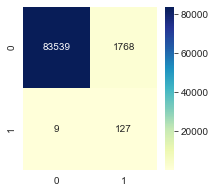

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.07      0.93      0.13       136

    accuracy                           0.98     85443
   macro avg       0.53      0.96      0.56     85443
weighted avg       1.00      0.98      0.99     85443

roc_auc 0.9565491918806746


In [40]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(eta = 0.039, max_depth = 2, subsample = 0.8, colsample_bytree = 0.9, eval_metric = 'auc', random_state = 42)


xgb_clf.fit(X_train_res, y_train_res)

y_train_pred = xgb_clf.predict(X_train_res)
y_pred_xgb = xgb_clf.predict(X_test)

print("Training Accuracy :", xgb_clf.score(X_train_res, y_train_res))
print("Testing Accuracy :", xgb_clf.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred_xgb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_xgb)
print(cr)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_xgb)
roc_auc_xgb = auc(false_positive_rate, true_positive_rate)
print("roc_auc",roc_auc_xgb)

## Logistic Regression

Training Accuracy : 0.9466579232995659
Testing Accuracy : 0.9730463583909741


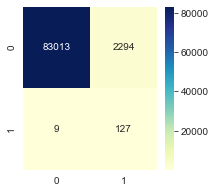

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.05      0.93      0.10       136

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443

roc_auc 0.9534662092415007


In [41]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_res, y_train_res)

y_train_pred = lr.predict(X_train_res)
y_pred_lr = lr.predict(X_test)


print("Training Accuracy :", lr.score(X_train_res, y_train_res))
print("Testing Accuracy :", lr.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred_lr)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_lr)
print(cr)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_lr)
roc_auc_lr = auc(false_positive_rate, true_positive_rate)
print("roc_auc",roc_auc_lr)

## Random Forest

Training Accuracy : 1.0
Testing Accuracy : 0.9995201479348805


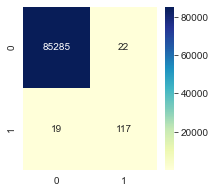

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.84      0.86      0.85       136

    accuracy                           1.00     85443
   macro avg       0.92      0.93      0.93     85443
weighted avg       1.00      1.00      1.00     85443

roc_auc 0.9300181127815867


In [42]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()

rf_clf.fit(X_train_res, y_train_res)

y_train_pred = rf_clf.predict(X_train_res)
y_pred_rf = rf_clf.predict(X_test)


print("Training Accuracy :", rf_clf.score(X_train_res, y_train_res))
print("Testing Accuracy :", rf_clf.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_rf)
print(cr)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_rf)
roc_auc_rf = auc(false_positive_rate, true_positive_rate)
print("roc_auc",roc_auc_rf)

## LGBM Classifier

Training Accuracy : 0.9994924827142627
Testing Accuracy : 0.9983731844621561


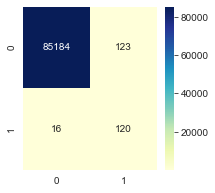

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.49      0.88      0.63       136

    accuracy                           1.00     85443
   macro avg       0.75      0.94      0.82     85443
weighted avg       1.00      1.00      1.00     85443

ROC Curves              = 0.9404555449901014


In [43]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier()

clf.fit(X_train_res,y_train_res)

y_pred_lgb = clf.predict(X_test)

print("Training Accuracy :", clf.score(X_train_res, y_train_res))
print("Testing Accuracy :", clf.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred_lgb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_lgb)
print(cr)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_lgb)
roc_auc_lgb = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc_lgb)

## MLP Classifier

Training Accuracy : 0.9999422133783566
Testing Accuracy : 0.9991105181231933


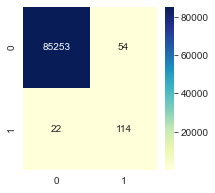

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.68      0.84      0.75       136

    accuracy                           1.00     85443
   macro avg       0.84      0.92      0.87     85443
weighted avg       1.00      1.00      1.00     85443

roc_auc 0.9188011431376917


In [44]:
from sklearn.neural_network import MLPClassifier
MLP_clf = MLPClassifier()

MLP_clf.fit(X_train_res, y_train_res)

y_train_pred = MLP_clf.predict(X_train_res)
y_pred_MLP = MLP_clf.predict(X_test)


print("Training Accuracy :", MLP_clf.score(X_train_res, y_train_res))
print("Testing Accuracy :", MLP_clf.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred_MLP)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_MLP)
print(cr)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_MLP)
roc_auc_MLP = auc(false_positive_rate, true_positive_rate)
print("roc_auc",roc_auc_MLP)

# Model Comparison

In [45]:
scores_df = {'XGBoost':  { 
                             'f1_score': roc_auc_xgb
                         },        
             'LogisticRegression':  { 
                             'f1_score': roc_auc_lr
                         },
             'RandomForest':  { 
                             'f1_score': roc_auc_rf
                         },
             'LGBMClassifier':  { 
                             'f1_score': roc_auc_lgb
                         },
             'MLPClassifier':  { 
                             'f1_score': roc_auc_MLP
                         }
            }

<AxesSubplot:>

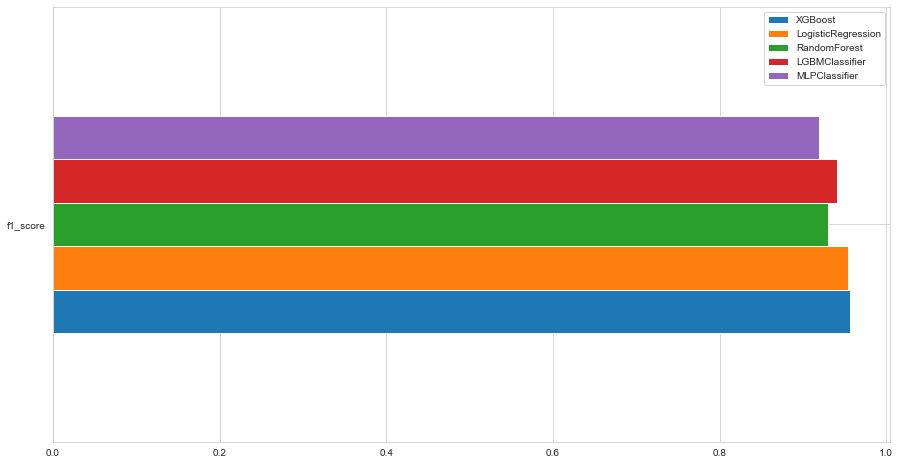

In [46]:
scores_df = pd.DataFrame(scores_df)

scores_df.plot(kind='barh', figsize=(15, 8))

In [47]:
from sklearn.metrics import recall_score


scores_df = {'XGBoost':  { 
                             'recall_score': recall_score(y_test, y_pred_xgb)
                         },        
             'LogisticRegression':  { 
                             'recall_score': recall_score(y_test, y_pred_lr)
                         },
             'RandomForest':  { 
                             'recall_score': recall_score(y_test, y_pred_rf)
                         },
             'MLPClassifier':  { 
                             'recall_score': recall_score(y_test, y_pred_MLP)
                         }
            }

<AxesSubplot:>

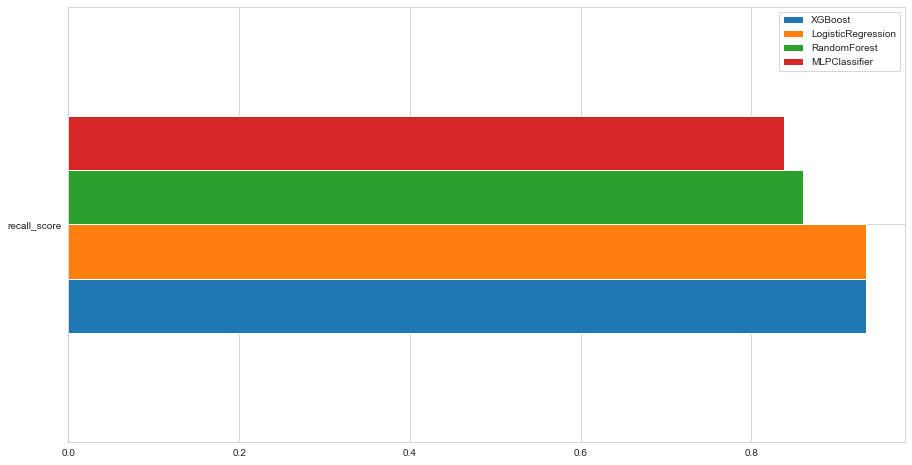

In [48]:
scores_df = pd.DataFrame(scores_df)

scores_df.plot(kind='barh', figsize=(15, 8))